<a href="https://colab.research.google.com/github/anash18/4105-HW-Nash/blob/main/ECGR_4105_HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
np.set_printoptions(suppress=True)
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Problem 1

In [3]:
file_path = '/content/drive/My Drive/4105 Datasets/cancer.csv'
cancer = pd.DataFrame(pd.read_csv(file_path))
#print(cancer.head())

standard = StandardScaler()

varlist = ['diagnosis']

# Defining the map function
def binary_map(x):
    return x.map({'M': 1, 'B': 0})

cancer[varlist] = cancer[varlist].apply(binary_map)
#print(cancer.head())

#Splitting the Variables into X and Y
x1 = cancer.iloc[:, 2:32].values
y1 = cancer.iloc[:, 1].values

#print(x1[0:10]) #<-Seeing the first values of the array to confirm that it split correctly
#print(y1[0:10]) #<-Seeing the first values of the array to confirm that it split correctly

#splitting the variables into training and test/validation set
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 0)

#Doing standard scaling on the inputs to make all values are weighted fairly
x1_train = standard.fit_transform(x1_train)
x1_test = standard.fit_transform(x1_test)

#setting up a function for PCA reduction
def pcaReduction(x_train,x_test,k):
  pca = PCA(n_components = k)
  x_traintransform = pca.fit_transform(x_train)
  x_testtransform = pca.fit_transform(x_test)
  return x_traintransform,x_testtransform

#using a for loop number of k can be changed easily from 1-31
highest_accuracy1 = 0 #setting up a highest accuracy value
accuracies_array1 = [] #accuracy array
precision_array1 = [] #precision array
recall_array1 = [] #recall array
k_array1 = [] #k value array

for k in range(1,31):
  x_traintransformed, x_testtransformed = pcaReduction(x1_train,x1_test,k)
  model_polyPCA = SVC(kernel= 'poly', C=1E6)
  model_polyPCA.fit(x_traintransformed,y1_train)
  y1_pred = model_polyPCA.predict(x_testtransformed)


  k_array1.append(k)
  accuracies_array1.append(metrics.accuracy_score(y1_test,y1_pred))
  precision_array1.append(metrics.precision_score(y1_test,y1_pred))
  recall_array1.append(metrics.recall_score(y1_test,y1_pred))

  if(metrics.accuracy_score(y1_test,y1_pred) > highest_accuracy1):
    highest_accuracy1 = metrics.accuracy_score(y1_test,y1_pred)
    highest_k1 = k

print("The most accurate K value is: ", highest_k1)
print("Accuracy: ", highest_accuracy1)
#rint(accuracies_array1)
#print(precision_array1)
#print(recall_array1)
#print(k_array1)

The most accurate K value is:  3
Accuracy:  0.9473684210526315


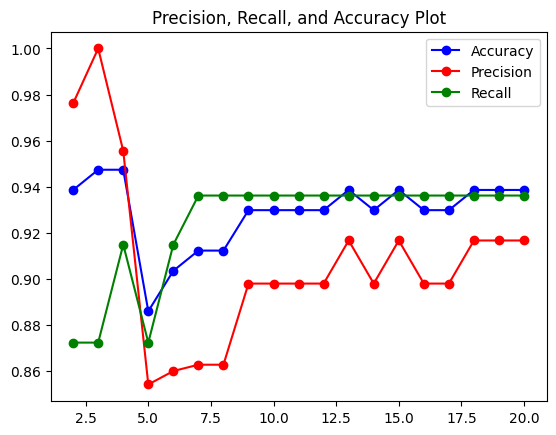

In [4]:
#Plotting Accuracies, precisions, recalls across different K values
plt.plot(k_array1[1:20], accuracies_array1[1:20], 'bo', linestyle = '-', label = 'Accuracy')
plt.plot(k_array1[1:20], precision_array1[1:20], 'ro', linestyle = '-', label = 'Precision')
plt.plot(k_array1[1:20], recall_array1[1:20], 'go', linestyle = '-', label = 'Recall')\

plt.legend(loc = 'upper right')
plt.title("Precision, Recall, and Accuracy Plot")
plt.show()

In [5]:
#Getting the x arrays using PCA
xtrain_pca1, xtest_pca1 = pcaReduction(x1_train,x1_test, highest_k1)

#Linear Kernelization
model_linear = SVC(kernel='linear', C=1E6)
model_linear.fit(xtrain_pca1, y1_train)
y1_pred_linear = model_linear.predict(xtest_pca1)

recall_linear1 = metrics.recall_score(y1_test, y1_pred_linear)
precision_linear1 = metrics.precision_score(y1_test, y1_pred_linear)
accuracy_linear1 = metrics.accuracy_score(y1_test, y1_pred_linear)

print("Recall using linear kernelization is: ",recall_linear1)
print("Precision using linear kernelization is: ",precision_linear1)
print("Accuracy using lienar kernelization is: ",accuracy_linear1)

Recall using linear kernelization is:  0.9361702127659575
Precision using linear kernelization is:  0.8979591836734694
Accuracy using lienar kernelization is:  0.9298245614035088


In [7]:
#Poly Kernelization
model_poly = SVC(kernel = 'poly', C=1E6)
model_poly.fit(xtrain_pca1, y1_train)
y1_pred_poly = model_poly.predict(xtest_pca1)

recall_poly1 = metrics.recall_score(y1_test, y1_pred_poly)
precision_poly1 = metrics.precision_score(y1_test, y1_pred_poly)
accuracy_poly1 = metrics.accuracy_score(y1_test, y1_pred_poly)

print("Recall using poly kernelization is: ",recall_poly1)
print("Precision using poly kernelization is: ",precision_poly1)
print("Accuracy using poly kernelization is: ",accuracy_poly1)

Recall using poly kernelization is:  0.8723404255319149
Precision using poly kernelization is:  1.0
Accuracy using poly kernelization is:  0.9473684210526315


In [8]:
#RBF Kernelization
model_rbf = SVC(kernel = 'rbf', C=1E6)
model_rbf.fit(xtrain_pca1, y1_train)
y1_pred_rbf = model_rbf.predict(xtest_pca1)

recall_rbf1 = metrics.recall_score(y1_test, y1_pred_rbf)
precision_rbf1 = metrics.precision_score(y1_test, y1_pred_rbf)
accuracy_rbf1 = metrics.accuracy_score(y1_test, y1_pred_rbf)

print("Recall using rbf kernelization is: ",recall_rbf1)
print("Precision using rbf kernelization is: ",precision_rbf1)
print("Accuracy using rbf kernelization is: ",accuracy_rbf1)

Recall using rbf kernelization is:  0.8936170212765957
Precision using rbf kernelization is:  0.8936170212765957
Accuracy using rbf kernelization is:  0.9122807017543859


In [9]:
#Sigmoid Kernelization
model_sig = SVC(kernel = 'sigmoid', C=1E6)
model_sig.fit(xtrain_pca1, y1_train)
y1_pred_sig = model_sig.predict(xtest_pca1)

recall_sig1 = metrics.recall_score(y1_test, y1_pred_sig)
precision_sig1 = metrics.precision_score(y1_test, y1_pred_sig)
accuracy_sig1 = metrics.accuracy_score(y1_test, y1_pred_sig)

print("Recall using sigmoid kernelization is: ",recall_sig1)
print("Precision using sigmoid kernelization is: ",precision_sig1)
print("Accuracy using sigmoid kernelization is: ",accuracy_sig1)

Recall using sigmoid kernelization is:  0.8723404255319149
Precision using sigmoid kernelization is:  0.8367346938775511
Accuracy using sigmoid kernelization is:  0.8771929824561403


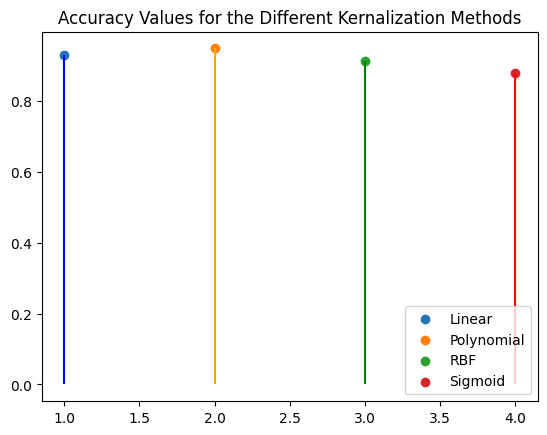

In [10]:
#Plotting Accuracies for the different kernalization methods
plt.scatter(1, accuracy_linear1 , label = 'Linear')
plt.scatter(2, accuracy_poly1 , label = 'Polynomial')
plt.scatter(3, accuracy_rbf1 , label = 'RBF')
plt.scatter(4, accuracy_sig1, label = 'Sigmoid')

line_colors = ['blue', 'orange', 'green', 'red']

# Add vertical lines
for x, y, color in zip([1, 2, 3, 4], [accuracy_linear1, accuracy_poly1, accuracy_rbf1, accuracy_sig1], line_colors):
    plt.vlines(x, 0, y, colors=color, linestyles='-', alpha=1)

plt.legend(loc = 'lower right')
plt.title("Accuracy Values for the Different Kernalization Methods")
plt.show()

Problem 2

In [11]:
#PREPROCESSING

#Importing the housing dataset
file_path = '/content/drive/My Drive/4105 Datasets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
#housing.head()
#housing.shape
#housing.isnull().sum()*100/housing.shape[0]

#mapping the variables to a binary output
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
#housing.head()

varlist2 = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

#Output variables
y2_train = df_train['price']
y2_test = df_test['price']

m_train = len(y2_train) #Number of Samples in set
m_test = len(y2_test) #Number of Samples in set

#Input Variables
x2_train = np.c_[np.ones((m_train, 1)), df_train[varlist2]]
x2_test = np.c_[np.ones((m_test, 1)), df_test[varlist2]]

x2_train = standard.fit_transform(x2_train)
x2_test = standard.fit_transform(x2_test)

#print('This is the training set after standard scaling: \n',x2_train)
#print('\nThis is the test set after standard scaling: \n',x2_test)

In [12]:
# Polynomial kernel SVR
model_poly = SVR(kernel='poly', degree=2, C=1E3)
model_poly.fit(x2_train, y2_train)
y_pred_poly = model_poly.predict(x2_test)

mse_poly = mean_squared_error(y2_test, y_pred_poly)

print(f'Polynomial Kernel MSE Loss: {mse_poly}')

# Linear kernel SVR
model_linear = SVR(kernel='linear', C=1E3)
model_linear.fit(x2_train, y2_train)
y_pred_linear = model_linear.predict(x2_test)

mse_linear = mean_squared_error(y2_test, y_pred_linear)

print(f'Linear Kernel MSE Loss: {mse_linear}')

# RBF kernel SVR
model_rbf = SVR(kernel='rbf', C=1E3)
model_rbf.fit(x2_train, y2_train)
y_pred_rbf = model_rbf.predict(x2_test)

mse_rbf = mean_squared_error(y2_test, y_pred_rbf)

print(f'RBF Kernel MSE Loss: {mse_rbf}')

# Sigmoid kernel SVR
model_sigmoid = SVR(kernel='sigmoid', C=1E3)
model_sigmoid.fit(x2_train, y2_train)
y_pred_sigmoid = model_sigmoid.predict(x2_test)

mse_sigmoid = mean_squared_error(y2_test, y_pred_sigmoid)

print(f'Sigmoid Kernel MSE Loss: {mse_sigmoid}')

Polynomial Kernel MSE Loss: 3614028333295.208
Linear Kernel MSE Loss: 2136878967470.7505
RBF Kernel MSE Loss: 3555230059536.649
Sigmoid Kernel MSE Loss: 3448214559055.742


In [13]:
#using a for loop number of k can be changed easily from 1-12
smallest_loss = 1000000000000000000 #setting up a dummy loss value super high
loss_array = [] #loss array
k_array2 = [] #k value array

for k in range(1,12):
  x_traintransformed, x_testtransformed = pcaReduction(x2_train,x2_test,k)
  model_linear = SVR(kernel='linear', C=1E3)
  model_linear.fit(x_traintransformed,y2_train)
  y_pred_linear = model_linear.predict(x_testtransformed)

  k_array2.append(k)
  loss_array.append(mean_squared_error(y2_test, y_pred_linear))

  if(mean_squared_error(y2_test, y_pred_linear) < smallest_loss):
    smallest_loss = mean_squared_error(y2_test, y_pred_linear)
    optimal_k = k

print("The most accurate K value is: ", optimal_k)
print("Smallest Loss Value: ", smallest_loss)

#Getting the x arrays using Optimal PCA
x2train_pca, x2test_pca = pcaReduction(x2_train,x2_test, optimal_k)

# RBF kernel SVR with PCA components
model_rbf_pca = SVR(kernel='rbf', C=1E3)
model_rbf_pca.fit(x2train_pca, y2_train)
y_pred_rbf_pca = model_rbf_pca.predict(x2test_pca)

mse_rbf_pca = mean_squared_error(y2_test, y_pred_rbf_pca)

print(f'\nRBF Kernel MSE Loss with PCA (1 Component(s)): {mse_rbf_pca}')

# Linear kernel SVR with PCA components
model_linear_pca = SVR(kernel='linear', C=1E3)
model_linear_pca.fit(x2train_pca, y2_train)
y_pred_linear_pca = model_linear_pca.predict(x2test_pca)

mse_linear_pca = mean_squared_error(y2_test, y_pred_linear_pca)

print(f'Linear Kernel MSE Loss with PCA (1 Component(s)): {mse_linear_pca}')

# Polynomial kernel SVR with PCA components
model_poly_pca = SVR(kernel='poly', degree=2, C=1E3)
model_poly_pca.fit(x2train_pca, y2_train)
y_pred_poly_pca = model_poly_pca.predict(x2test_pca)

mse_poly_pca = mean_squared_error(y2_test, y_pred_poly_pca)

print(f'Polynomial Kernel MSE Loss with PCA (1 Component(s)): {mse_poly_pca}')

# Sigmoid kernel SVR with PCA components
model_sigmoid_pca = SVR(kernel='sigmoid', C=1E3)
model_sigmoid_pca.fit(x2train_pca, y2_train)
y_pred_sigmoid_pca = model_sigmoid_pca.predict(x2test_pca)

mse_sigmoid_pca = mean_squared_error(y2_test, y_pred_sigmoid_pca)

print(f'Sigmoid Kernel MSE Loss with PCA (1 Component(s)): {mse_sigmoid_pca}')

The most accurate K value is:  1
Smallest Loss Value:  2099300826492.769

RBF Kernel MSE Loss with PCA (1 Component(s)): 3419160021636.032
Linear Kernel MSE Loss with PCA (1 Component(s)): 2099300826492.769
Polynomial Kernel MSE Loss with PCA (1 Component(s)): 3481529091125.8345
Sigmoid Kernel MSE Loss with PCA (1 Component(s)): 3127729267336.415


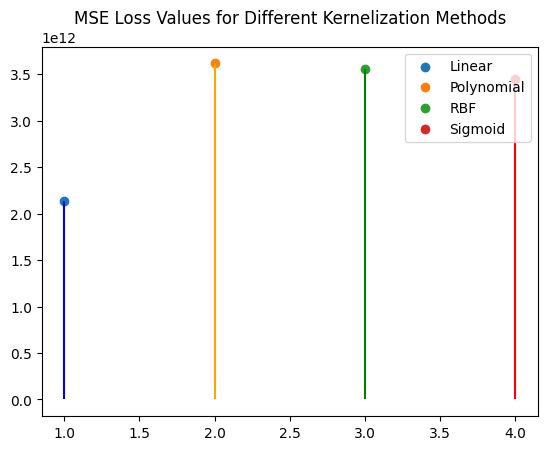

In [14]:
# Plotting MSE Losses for the different kernelization methods
plt.scatter(1, mse_linear, label='Linear')
plt.scatter(2, mse_poly, label='Polynomial')
plt.scatter(3, mse_rbf, label='RBF')
plt.scatter(4, mse_sigmoid, label='Sigmoid')

line_colors = ['blue', 'orange', 'green', 'red']

# Add vertical lines
for x, y, color in zip([1, 2, 3, 4], [mse_linear, mse_poly, mse_rbf, mse_sigmoid], line_colors):
    plt.vlines(x, 0, y, colors=color, linestyles='-', alpha=1)

plt.legend(loc='upper right')
plt.title("MSE Loss Values for Different Kernelization Methods")
plt.show()